In [ ]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

Saving prediction20.csv to prediction20.csv


In [ ]:
# Installation of necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geneview
!pip install gprofiler-official
!pip install statsmodels
!pip install scikit-learn
!pip install lifelines
!pip install gseapy
!pip install scikit-learn==1.5.2
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geneview: filename=geneview-0.2.1-py3-none-any.whl size=54470 sha256=a7a5eb7ca6a952bbfd9ebd9a06e1aa9939956255361c9aa25a14af09accdc617
  Stored in directory: /root/.cache/pip/wheels/91/cb/65/81dafd0254adb97b0938e9c3da9c2c74a8e6169e4595437ca7
Successfully built geneview
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=291e5bf57e4dc1d8a55f19d7255cf54b36850bbd0ff7613d1132209ee885ea6f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geneview
from gprofiler import GProfiler
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

prediction = pd.read_csv('prediction20.csv', sep=",")


In [ ]:
prediction

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,PKHD1,LRP2,RB1,Sex,Grade_G2,Grade_G3,Grade_G4,Diagnosis Age,TMB (nonsynonymous),Overall Survival Status
0,TCGA-02-0003,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0.480000,0.106101,1.0
1,TCGA-02-0033,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0.533333,0.053050,1.0
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0.853333,0.119363,1.0
3,TCGA-02-0055,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0.640000,0.108753,1.0
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0.573333,0.111406,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.280000,0.071618,0.0
741,TCGA-VW-A8FI,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0.693333,0.095491,1.0
742,TCGA-W9-A837,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.440000,0.045093,0.0
743,TCGA-WH-A86K,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.680000,0.071618,0.0


In [ ]:
prediction.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'Diagnosis Age', 'TMB (nonsynonymous)',
       'Overall Survival Status'],
      dtype='object')

Dropping Age at diagnosis to explore other features

In [ ]:
# Create a new DataFrame with 'Diagnosis Age' removed
prediction_no_age = prediction.drop(columns=['Diagnosis Age'])

# Verify the new DataFrame
print("Columns in prediction_no_age DataFrame:", prediction_no_age.columns)

Columns in prediction_no_age DataFrame: Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'TMB (nonsynonymous)',
       'Overall Survival Status'],
      dtype='object')


In [ ]:
print("Unique values in Overall Survival Status:", prediction_no_age['Overall Survival Status'].unique())


Unique values in Overall Survival Status: [ 1.  0. nan]


In [ ]:
# Drop rows with NaN in 'Overall Survival Status' column
prediction_no_age = prediction_no_age.dropna(subset=['Overall Survival Status'])

# Verify the change
print("Unique values in Overall Survival Status after dropping NaNs:", prediction_no_age['Overall Survival Status'].unique())


Unique values in Overall Survival Status after dropping NaNs: [1. 0.]


In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Calculate sample weights for the modified DataFrame
sample_weights = compute_sample_weight('balanced', prediction_no_age['Overall Survival Status'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y) while retaining Patient ID
X = prediction_no_age.drop(columns=['Overall Survival Status'])
y = prediction_no_age['Overall Survival Status']

# Step 1: Calculate Sample Weights
sample_weights = compute_sample_weight('balanced', y)

# Step 2: Apply each feature selection method

# 2a. Calculate Weight of Evidence (WoE) for each feature
def calculate_woe(feature, target):
    feature_data = pd.crosstab(feature, target, normalize='columns')
    woe = np.log((feature_data[1] + 1e-5) / (feature_data[0] + 1e-5))
    return abs(woe.sum())

woe_importance = [calculate_woe(X[feature], y) for feature in X.columns.drop('Patient ID')]
woe_threshold = 0.3  # Adjust as needed
woe_selected = [woe >= woe_threshold for woe in woe_importance]

# 2b. RFE with Logistic Regression using sample weights
rfe_lr = RFE(estimator=LogisticRegression(max_iter=1000, class_weight='balanced'))
rfe_lr.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)

# 2c. Random Forest for feature importance using sample weights
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)
rf_importances = rf.feature_importances_
rf_selected = rf_importances > 0.01  # Adjust threshold as needed

# 2d. LASSO for feature selection using sample weights
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed
lasso.fit(X.drop(columns=['Patient ID']), y, sample_weight=sample_weights)
lasso_importances = lasso.coef_
lasso_selected = lasso_importances != 0

# Step 3: Combine selections with voting (at least three methods)
selected_features = pd.DataFrame({
    'Feature': X.columns.drop('Patient ID'),
    'WoE_Importance': woe_selected,
    'RFE_LR': rfe_lr.support_,
    'RF_Importance': rf_selected,
    'LASSO_Importance': lasso_selected
})

# Voting rule: Retain features selected by at least three methods
selected_features['Selected'] = (
    selected_features[['WoE_Importance', 'RFE_LR', 'RF_Importance', 'LASSO_Importance']].sum(axis=1) >= 2
)

# Final list of selected features, including Patient ID for tracking
final_selected_features = ['Patient ID'] + selected_features[selected_features['Selected']]['Feature'].tolist()

# Print the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Final selected features: ['Patient ID', 'IDH1', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'FLG', 'PCLO', 'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'TMB (nonsynonymous)']
Number of selected features: 21


In [ ]:
# Count the number of patients with TP53 mutations
tp53_mutations_count = prediction_no_age['TP53'].sum()
total_patients = prediction_no_age['Patient ID'].nunique()

# Display results
print(f"Number of patients with TP53 mutations: {tp53_mutations_count}")
print(f"Total number of patients: {total_patients}")
print(f"Percentage of patients with TP53 mutations: {tp53_mutations_count / total_patients * 100:.2f}%")


Number of patients with TP53 mutations: 286
Total number of patients: 744
Percentage of patients with TP53 mutations: 38.44%


In [ ]:
# Compute correlation matrix for selected gene features, including TP53
gene_columns = [col for col in prediction_no_age.columns if col != 'Patient ID' and col != 'Overall Survival Status']
correlation_matrix = prediction_no_age[gene_columns].corr()

# Display correlations of TP53 with other genes
tp53_correlations = correlation_matrix['TP53'].sort_values(ascending=False)
print("TP53 Correlations with Other Genes:")
print(tp53_correlations)


TP53 Correlations with Other Genes:
TP53                   1.000000
ATRX                   0.593104
IDH1                   0.371670
Grade_G2               0.103532
Grade_G3               0.089505
RB1                    0.051975
LRP2                   0.045218
PKHD1                  0.023949
Sex                    0.012610
RYR2                  -0.001738
TTN                   -0.008594
FLG                   -0.014156
HMCN1                 -0.030663
MUC16                 -0.037631
TMB (nonsynonymous)   -0.037717
PIK3R1                -0.045537
NOTCH1                -0.054640
PCLO                  -0.063659
NF1                   -0.075741
PTEN                  -0.084757
PIK3CA                -0.088759
FUBP1                 -0.154513
EGFR                  -0.154594
Grade_G4              -0.180945
CIC                   -0.239970
Name: TP53, dtype: float64


In [ ]:
# Define the genes of interest
genes_of_interest = ['ATRX', 'TP53', 'IDH1']

# Calculate the mutation count and percentage for each gene
mutation_counts = prediction_no_age[genes_of_interest].sum()
total_patients = prediction_no_age['Patient ID'].nunique()

# Create a DataFrame with the results
mutation_summary = pd.DataFrame({
    'Gene': genes_of_interest,
    'Mutation Count': mutation_counts.values,
    'Mutation Percentage': (mutation_counts / total_patients * 100).values
})

# Display the results
print("Mutation Summary for ATRX, TP53, and IDH1:")
print(mutation_summary)


Mutation Summary for ATRX, TP53, and IDH1:
   Gene  Mutation Count  Mutation Percentage
0  ATRX             187            25.134409
1  TP53             286            38.440860
2  IDH1             361            48.521505


In [ ]:
# Create a new DataFrame with only the genes of interest
gene_mutations = prediction_no_age[['ATRX', 'TP53', 'IDH1']]

# Count the number of mutations per patient in these genes
gene_mutations['Mutation Count'] = gene_mutations.sum(axis=1)

# Calculate percentages of patients with 1, 2, or 3 mutations
mutation_summary = gene_mutations['Mutation Count'].value_counts(normalize=True).sort_index() * 100

# Display results
print("Percentage of Patients with Mutations in 1, 2, or 3 Genes:")
print(mutation_summary)


Percentage of Patients with Mutations in 1, 2, or 3 Genes:
Mutation Count
0    39.516129
1    29.838710
2     9.677419
3    20.967742
Name: proportion, dtype: float64


<ipython-input-19-5203b687e9a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_mutations['Mutation Count'] = gene_mutations.sum(axis=1)


In [ ]:
# Define conditions for each mutation combination
only_tp53 = (gene_mutations['TP53'] == 1) & (gene_mutations['ATRX'] == 0) & (gene_mutations['IDH1'] == 0)
only_atrx = (gene_mutations['ATRX'] == 1) & (gene_mutations['TP53'] == 0) & (gene_mutations['IDH1'] == 0)
only_idh1 = (gene_mutations['IDH1'] == 1) & (gene_mutations['TP53'] == 0) & (gene_mutations['ATRX'] == 0)

tp53_atrx = (gene_mutations['TP53'] == 1) & (gene_mutations['ATRX'] == 1) & (gene_mutations['IDH1'] == 0)
tp53_idh1 = (gene_mutations['TP53'] == 1) & (gene_mutations['IDH1'] == 1) & (gene_mutations['ATRX'] == 0)
atrx_idh1 = (gene_mutations['ATRX'] == 1) & (gene_mutations['IDH1'] == 1) & (gene_mutations['TP53'] == 0)

all_three = (gene_mutations['ATRX'] == 1) & (gene_mutations['TP53'] == 1) & (gene_mutations['IDH1'] == 1)

# Calculate the percentages
total_patients = len(gene_mutations)
mutation_combinations = {
    "TP53 only": only_tp53.sum() / total_patients * 100,
    "ATRX only": only_atrx.sum() / total_patients * 100,
    "IDH1 only": only_idh1.sum() / total_patients * 100,
    "TP53 + ATRX": tp53_atrx.sum() / total_patients * 100,
    "TP53 + IDH1": tp53_idh1.sum() / total_patients * 100,
    "ATRX + IDH1": atrx_idh1.sum() / total_patients * 100,
    "All three": all_three.sum() / total_patients * 100
}

# Display results
mutation_combinations_df = pd.DataFrame(list(mutation_combinations.items()), columns=['Combination', 'Percentage'])
print(mutation_combinations_df)


   Combination  Percentage
0    TP53 only    9.543011
1    ATRX only    1.209677
2    IDH1 only   19.086022
3  TP53 + ATRX    1.209677
4  TP53 + IDH1    6.720430
5  ATRX + IDH1    1.747312
6    All three   20.967742


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y) with Patient ID for traceability
X = prediction_no_age.drop(columns=['Overall Survival Status', 'Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Compute sample weights for imbalance
sample_weights = compute_sample_weight('balanced', y)

# Define models with appropriate class balancing
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(penalty='l2', class_weight='balanced', max_iter=1000)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=sample_weights.sum()/len(sample_weights))

# Fit models
gb_model.fit(X, y, sample_weight=sample_weights)
lr_model.fit(X, y, sample_weight=sample_weights)
rf_model.fit(X, y, sample_weight=sample_weights)
xgb_model.fit(X, y, sample_weight=sample_weights)

# Extract feature importances
gb_importances = gb_model.feature_importances_
lr_importances = np.abs(lr_model.coef_[0])
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Compile feature importances into a DataFrame for diagnostics
selected_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Gradient Boosting': gb_importances,
    'Logistic Regression': lr_importances,
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances
})

# Set per-model thresholds
gb_threshold = 0.02
lr_threshold = 0.05
rf_threshold = 0.05
xgb_threshold = 0.02

# Diagnostic Output
print("Before Voting:")
print(selected_features_df)

# Voting rule with strict per-model thresholds
selected_features_df['Selected'] = (
    (selected_features_df['Gradient Boosting'] > gb_threshold).astype(int) +
    (selected_features_df['Logistic Regression'] > lr_threshold).astype(int) +
    (selected_features_df['Random Forest'] > rf_threshold).astype(int) +
    (selected_features_df['XGBoost'] > xgb_threshold).astype(int)
) >= 3

# Display final selected features after voting
final_selected_features = ['Patient ID'] + selected_features_df[selected_features_df['Selected']]['Feature'].tolist()

print("After Voting and Thresholds:")
print(selected_features_df[selected_features_df['Selected']])  # For verification

# Ensure TP53 is included in final selected features if not automatically selected
if 'TP53' not in final_selected_features:
    final_selected_features.append('TP53')

# Display the final list and count
print("Final selected features:", final_selected_features)
print(f"Number of selected features: {len(final_selected_features) - 1}")  # Exclude 'Patient ID'


Before Voting:
                Feature  Gradient Boosting  Logistic Regression  \
0                  IDH1           0.231778             1.385651   
1                  TP53           0.001580             0.093710   
2                  ATRX           0.023447             0.657989   
3                  PTEN           0.006091             0.089202   
4                   TTN           0.013356             0.302372   
5                  EGFR           0.020677             0.509270   
6                   CIC           0.012325             0.166570   
7                 MUC16           0.014291             0.054144   
8                PIK3CA           0.009344             0.376695   
9                   NF1           0.003695             0.112133   
10                 RYR2           0.006479             0.307719   
11                FUBP1           0.002469             0.349403   
12               PIK3R1           0.021654             0.261401   
13                  FLG           0.018579     

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_sample_weight

# Define features (X) and target variable (y)
X = prediction_no_age.drop(columns=['Patient ID', 'Overall Survival Status'])
y = prediction_no_age['Overall Survival Status']

# Apply sample weighting for class imbalance
sample_weights = compute_sample_weight('balanced', y)


In [ ]:
# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])  # Ensures selected features are used
y = prediction_no_age['Overall Survival Status']


In [ ]:
# Initialize Random Forest model with sample weighting
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Random Forest CV Accuracy:", rf_scores.mean(), "±", rf_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Random Forest CV Accuracy: 0.6845225225225224 ± 0.15671633423105658


In [ ]:
# Initialize SVM model with sample weighting
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("SVM CV Accuracy:", svm_scores.mean(), "±", svm_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


SVM CV Accuracy: 0.7195675675675677 ± 0.19985866607511482


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])  # Ensures selected features are used
y = prediction_no_age['Overall Survival Status']

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=6)  # Adjust n_neighbors if needed

# Perform cross-validation to evaluate KNN
knn_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("KNN cross-validation scores for each fold:", knn_scores)
print("Mean cross-validation accuracy for KNN:", knn_scores.mean())
print("Standard deviation of cross-validation accuracy for KNN:", knn_scores.std())


KNN cross-validation scores for each fold: [0.4        0.37333333 0.84       0.86666667 0.85135135 0.83783784
 0.82432432 0.63513514 0.63513514 0.68918919]
Mean cross-validation accuracy for KNN: 0.6952972972972973
Standard deviation of cross-validation accuracy for KNN: 0.1760007240026132


In [ ]:
# Initialize Gradient Boosting model with sample weighting
gb_model = GradientBoostingClassifier(random_state=42)
gb_scores = cross_val_score(gb_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Gradient Boosting CV Accuracy:", gb_scores.mean(), "±", gb_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Gradient Boosting CV Accuracy: 0.7276936936936937 ± 0.18679777388193408


In [ ]:
# Initialize Logistic Regression model with class weights
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy', fit_params={'sample_weight': sample_weights})
print("Logistic Regression CV Accuracy:", lr_scores.mean(), "±", lr_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Logistic Regression CV Accuracy: 0.6941981981981982 ± 0.18177843937784335


In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Initialize individual models
knn_model = KNeighborsClassifier(n_neighbors=6)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create the ensemble model with soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('logreg', lr_model),
        ('adaboost', ada_model),
        ('svm', svm_model),
        ('randomforest', rf_model)
    ],
    voting='soft'
)

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Ensemble Voting Classifier cross-validation scores for each fold:", ensemble_scores)
print("Mean cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.mean())
print("Standard deviation of cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Ensemble Voting Classifier cross-validation scores for each fold: [0.41333333 0.4        0.90666667 0.94666667 0.90540541 0.95945946
 0.83783784 0.63513514 0.63513514 0.7027027 ]
Mean cross-validation accuracy for Ensemble Voting Classifier: 0.7342342342342343
Standard deviation of cross-validation accuracy for Ensemble Voting Classifier: 0.20023625361048547


In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features (X) and target variable (y)
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Initialize individual models
knn_model = KNeighborsClassifier(n_neighbors=6)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Create the ensemble model with soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('gradientboosting', gb_model)
    ],
    voting='soft'
)

# Evaluate the ensemble model using cross-validation
ensemble_scores = cross_val_score(ensemble_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Ensemble Voting Classifier cross-validation scores for each fold:", ensemble_scores)
print("Mean cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.mean())
print("Standard deviation of cross-validation accuracy for Ensemble Voting Classifier:", ensemble_scores.std())


Ensemble Voting Classifier cross-validation scores for each fold: [0.41333333 0.41333333 0.89333333 0.92       0.89189189 0.90540541
 0.81081081 0.63513514 0.64864865 0.7027027 ]
Mean cross-validation accuracy for Ensemble Voting Classifier: 0.7234594594594594
Standard deviation of cross-validation accuracy for Ensemble Voting Classifier: 0.18514170304651442


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report

# Perform cross-validation predictions
y_pred = cross_val_predict(ensemble_model, X, y, cv=10, method='predict_proba')[:, 1]
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary class predictions

# Evaluate metrics
accuracy = accuracy_score(y, y_pred_class)
precision = precision_score(y, y_pred_class)
f1 = f1_score(y, y_pred_class)
roc_auc = roc_auc_score(y, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y, y_pred_class))


Accuracy: 0.7231182795698925
Precision: 0.6115107913669064
F1-Score: 0.6227106227106227
ROC-AUC Score: 0.7394644424934153

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78       476
         1.0       0.61      0.63      0.62       268

    accuracy                           0.72       744
   macro avg       0.70      0.70      0.70       744
weighted avg       0.73      0.72      0.72       744



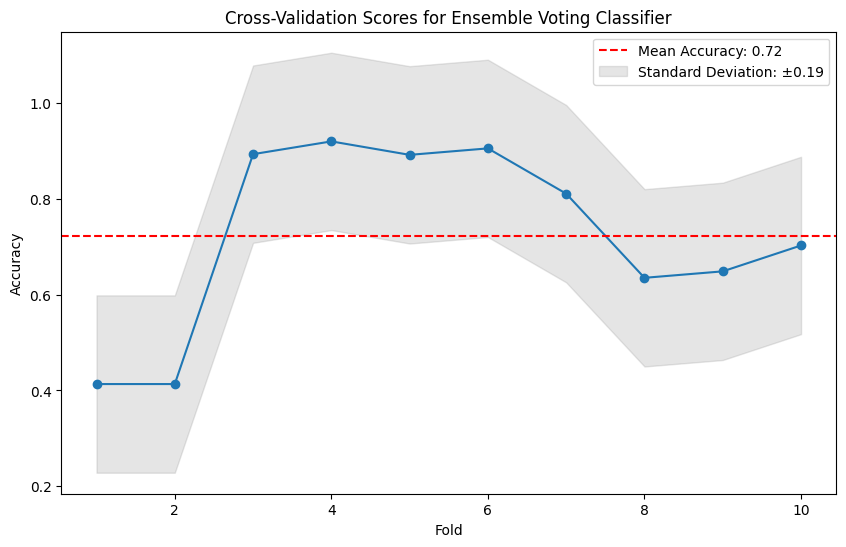

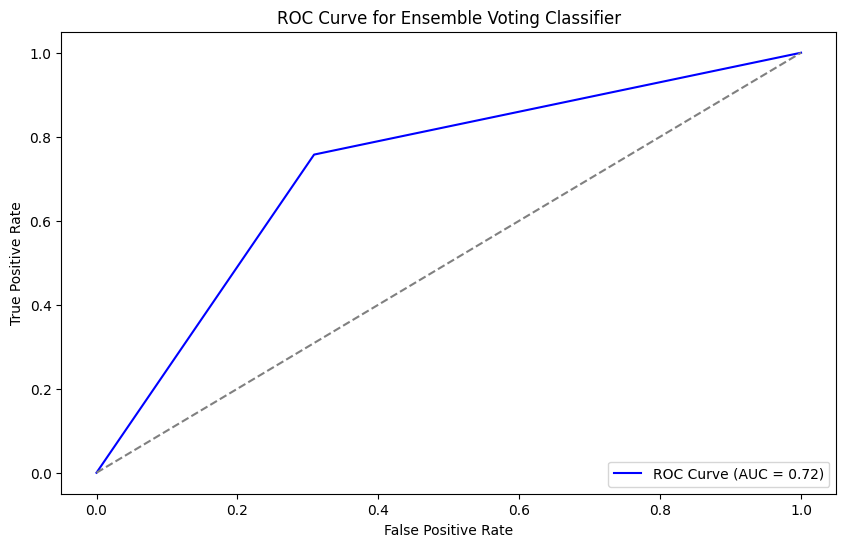

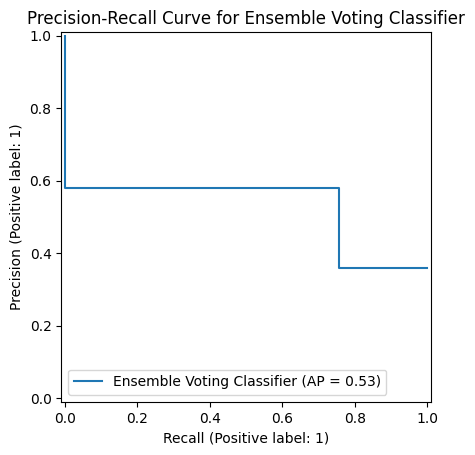

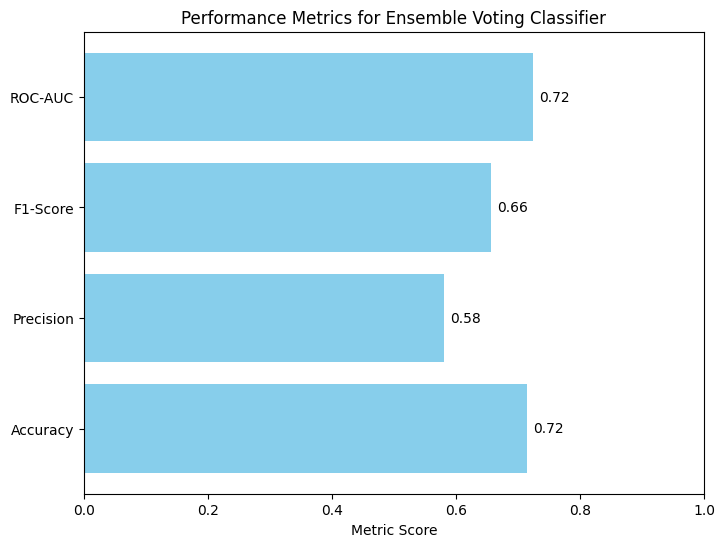

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, PrecisionRecallDisplay

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ensemble_scores) + 1), ensemble_scores, marker='o', linestyle='-')
plt.axhline(y=ensemble_scores.mean(), color='r', linestyle='--', label=f'Mean Accuracy: {ensemble_scores.mean():.2f}')
plt.fill_between(range(1, len(ensemble_scores) + 1),
                 ensemble_scores - ensemble_scores.std(),
                 ensemble_scores + ensemble_scores.std(),
                 color='gray', alpha=0.2, label=f'Standard Deviation: ±{ensemble_scores.std():.2f}')
plt.title("Cross-Validation Scores for Ensemble Voting Classifier")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Ensemble Voting Classifier")
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
disp = PrecisionRecallDisplay.from_predictions(y, y_pred, name="Ensemble Voting Classifier")
plt.title("Precision-Recall Curve for Ensemble Voting Classifier")
plt.show()

# Bar Plot of Model Metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'F1-Score': f1, 'ROC-AUC': roc_auc}
plt.figure(figsize=(8, 6))
plt.barh(list(metrics.keys()), list(metrics.values()), color='skyblue')
plt.xlim(0, 1)
plt.xlabel("Metric Score")
plt.title("Performance Metrics for Ensemble Voting Classifier")
for i, (metric, score) in enumerate(metrics.items()):
    plt.text(score + 0.01, i, f"{score:.2f}", va='center')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

# Define features (X) and target (y), drop Patient ID for model input
X = prediction_no_age[final_selected_features].drop(columns=['Patient ID'])
y = prediction_no_age['Overall Survival Status']

# Compute sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y)

# Initialize models
logreg = LogisticRegression(class_weight='balanced', random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)

# Create ensemble model with Voting
ensemble_model = VotingClassifier(
    estimators=[('logreg', logreg), ('grad_boost', grad_boost), ('ada_boost', ada_boost)],
    voting='soft'
)

# Cross-validate predictions
y_pred = cross_val_predict(ensemble_model, X, y, cv=5, fit_params={'sample_weight': sample_weights})

# Evaluate performance
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print("\nClassification Report:")
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ense

Accuracy: 0.7150537634408602
Precision: 0.58
Recall: 0.7574626865671642
F1-Score: 0.656957928802589
ROC-AUC Score: 0.7243195785776998

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.69      0.76       476
         1.0       0.58      0.76      0.66       268

    accuracy                           0.72       744
   macro avg       0.71      0.72      0.71       744
weighted avg       0.74      0.72      0.72       744



In [ ]:
import pandas as pd
import numpy as np

# Get feature names
features = X.columns

# Initialize models
logreg = LogisticRegression(class_weight='balanced', random_state=42)
grad_boost = GradientBoostingClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)

# Fit each model independently
logreg.fit(X, y, sample_weight=sample_weights)
grad_boost.fit(X, y, sample_weight=sample_weights)
ada_boost.fit(X, y, sample_weight=sample_weights)

# Extract feature importances/coefs
logreg_importance = np.abs(logreg.coef_[0])  # Take absolute for coefficients
grad_importance = grad_boost.feature_importances_
ada_importance = ada_boost.feature_importances_

# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Logistic Regression Importance': logreg_importance,
    'Gradient Boosting Importance': grad_importance,
    'AdaBoost Importance': ada_importance
})

# Calculate mean importance for an overall view
importance_df['Mean Importance'] = importance_df[['Logistic Regression Importance',
                                                  'Gradient Boosting Importance',
                                                  'AdaBoost Importance']].mean(axis=1)

# Sort by mean importance
importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

# Display or plot feature importances
print("Feature Importances:")
print(importance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Feature Importances:
               Feature  Logistic Regression Importance  \
7  TMB (nonsynonymous)                        0.714550   
0                 IDH1                        1.259370   
6             Grade_G4                        1.151842   
5             Grade_G2                        0.852748   
4                  RB1                        0.823087   
1                 ATRX                        0.595384   
2                 EGFR                        0.433944   
3               PIK3R1                        0.236068   
8                 TP53                        0.003258   

   Gradient Boosting Importance  AdaBoost Importance  Mean Importance  
7                      0.303419                 0.70         0.572656  
0                      0.244522                 0.08         0.527964  
6                      0.313812                 0.08         0.515218  
5                      0.026316                 0.02         0.299688  
4                      0.027052       

Survival with Cox

In [ ]:
prediction_no_age.columns

Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'Sex', 'Grade_G2',
       'Grade_G3', 'Grade_G4', 'TMB (nonsynonymous)',
       'Overall Survival Status'],
      dtype='object')

In [ ]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

Saving lgggbm_tcga_pub_clinical_data_short.csv to lgggbm_tcga_pub_clinical_data_short.csv


In [ ]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

clinical_data = pd.read_csv('lgggbm_tcga_pub_clinical_data_short.csv', sep=",")

In [ ]:
clinical_data.columns

Index(['Patient ID', 'Sample ID', 'Absolute Extract Ploidy', 'Diagnosis Age',
       'ATRX status', 'BCR Status', 'BRAF-KIAA1549 fusion',
       'BRAF V600E status', 'Cancer Type', 'Cancer Type Detailed',
       'Chr 19/20 co-gain', 'Chr 7 gain/Chr 10 loss', 'DAXX status',
       'ESTIMATE combined score', 'ESTIMATE immune score',
       'ESTIMATE stromal score', 'Neoplasm Histologic Grade',
       'Neoplasm Histologic Type Name', 'HM27', 'HM450', 'IDH-1P10Q Subtype',
       'IDH/codel subtype', 'IDH-specific DNA Methylation Cluster',
       'IDH-specific RNA Expression Cluster', 'IDH status', 'Mutation Count',
       'Oncotree Code', 'Original Subtype', 'Overall Survival (Months)',
       'Overall Survival Status', 'Pan-Glioma DNA Methylation Cluster',
       'Pan-Glioma RNA Expression Cluster', 'Percent aneuploidy', 'Sex',
       'Study', 'Telomere length estimate in blood normal (Kb)',
       'Telomere length estimate in tumor (Kb)', 'Telomere Maintenance',
       'TERT expression (

In [ ]:
# Merge clinical_data with prediction_no_age on Patient ID
merged_df = prediction_no_age.merge(
    clinical_data[['Patient ID', 'Overall Survival (Months)']],
    on='Patient ID',
    how='left'
)

# Filter to retain only the rows where Patient ID is in prediction_no_age
merged_df = merged_df[merged_df['Patient ID'].isin(prediction_no_age['Patient ID'])]

# Display the merged DataFrame for verification
print(merged_df.head())


     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   PKHD1  LRP2  RB1  Sex  Grade_G2  Grade_G3  Grade_G4  TMB (nonsynonymous)  \
0      0     0    0    1         0         0         1             0.106101   
1      0     0    1    1         0         0         1             0.053050   
2      0     0    0    1         0         0         1             0.119363   
3      0     0    0    0         0         0         1             0.108753   
4      0     0    0    1         0         0         1             0.111406   

   Overall Survival Status  Overall Survival (Mont

<lifelines.CoxPHFitter: fitted with 744 total observations, 476 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 744
number of events observed = 268
   partial log-likelihood = -1356.25
         time fit was run = 2024-10-30 15:30:28 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
IDH1                -0.84      0.43      0.16           -1.15           -0.52                0.32                0.59
TP53                -0.10      0.90      0.13           -0.36            0.16                0.70                1.17
ATRX                -0.13      0.88      0.17           -0.47            0.21                0.62                1.24
PTEN                 0.15      1.16      0.15           -0.14            0.44                0.87                1.56
TTN                 -0.06      0.94      0.16           -0.38            0.25                0.69                1.28
EGFR                 0.12      1.13      0.15           -0.18            0.42                0.84                1.52
CIC                 -0.43      0.65      0.25           -0.92            0.06                0.40                1.07
MUC16                0.17      1.19      0.19           -0.19            0.54                0.83                1.71
PIK3CA               0.22      1.25      0.19           -0.15            0.60                0.86                1.82
NF1                  0.16      1.17      0.20           -0.24            0.56                0.78                1.75
RYR2                -0.02      0.98      0.21           -0.43            0.39                0.65                1.48
FUBP1                0.00      1.00      0.33           -0.65            0.65                0.52                1.92
PIK3R1               0.15      1.16      0.23           -0.31            0.60                0.73                1.83
FLG                  0.13      1.14      0.23           -0.31            0.58                0.73                1.79
PCLO                 0.15      1.17      0.25           -0.34            0.65                0.71                1.92
HMCN1                0.17      1.18      0.26           -0.34            0.68                0.71                1.97
NOTCH1              -0.52      0.60      0.37           -1.24            0.20                0.29                1.23
PKHD1                0.57      1.76      0.25            0.07            1.06                1.07                2.90
LRP2                -0.23      0.79      0.32           -0.86            0.40                0.42                1.49
RB1                 -0.38      0.68      0.29           -0.96            0.20                0.38                1.22
Sex                  0.13      1.14      0.11           -0.09            0.35                0.91                1.42
Grade_G2            -0.75      0.47      0.19           -1.12           -0.39                0.33                0.68
Grade_G3            -0.11      0.90      0.17           -0.44            0.23                0.64                1.26
Grade_G4             0.74      2.09      0.17            0.40            1.07                1.49                2.93
TMB (nonsynonymous)  1.21      3.37      0.96           -0.67            3.10                0.51               22.30

                     cmp to     z      p  -log2(p)
covariate                                         
IDH1                   0.00 -5.19 <0.005     22.21
TP53                   0.00 -0.77   0.44      1.18
ATRX                   0.00 -0.74   0.46      1.12
PTEN                   0.00  1.00   0.32      1.65
TTN                    0.00 -0.40   0.69      

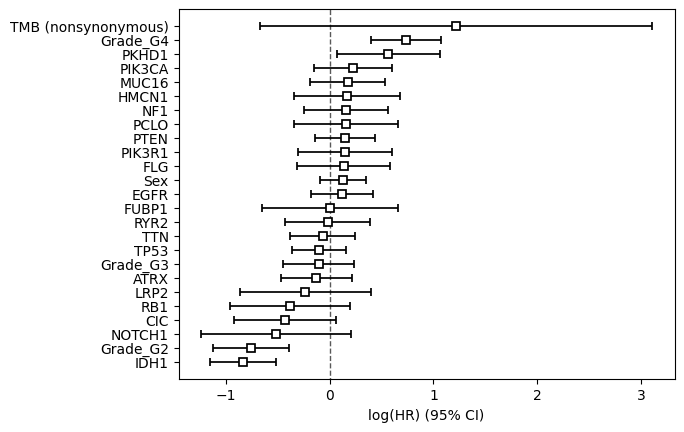

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# Define the DataFrame with all features for Cox analysis
# Ensure "Overall Survival (Months)" and "Overall Survival Status" are correctly included.
# Drop "Patient ID" as it’s not relevant for the survival model itself.
cox_data = merged_df.drop(columns=['Patient ID']).copy()

# Instantiate the Cox model with Ridge regularization to handle collinearity
cox_model = CoxPHFitter(penalizer=0.1)  # Adjust penalizer value for stronger regularization if needed

# Fit the model with all available features
try:
    cox_model.fit(cox_data, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')
    cox_model.print_summary()  # Display the model summary

    # Plot the coefficients to visualize feature importance
    cox_model.plot()
except Exception as e:
    print(f"An error occurred: {e}")


<lifelines.CoxPHFitter: fitted with 744 total observations, 476 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 744
number of events observed = 268
   partial log-likelihood = -1338.80
         time fit was run = 2024-10-30 15:36:37 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
IDH1                -1.53      0.22      0.24           -2.00           -1.05                0.13                0.35
ATRX                 0.29      1.34      0.24           -0.18            0.77                0.83                2.16
EGFR                 0.05      1.05      0.16           -0.27            0.36                0.77                1.44
PIK3R1               0.14      1.15      0.26           -0.36            0.64                0.70                1.90
RB1                 -0.57      0.56      0.33           -1.23            0.08                0.29                1.08
Grade_G2            -1.05      0.35      0.26           -1.56           -0.54                0.21                0.58
Grade_G4             0.94      2.57      0.18            0.58            1.30                1.79                3.67
TMB (nonsynonymous)  0.85      2.33      1.01           -1.14            2.83                0.32               16.94
TP53                 0.04      1.04      0.16           -0.28            0.36                0.75                1.43

                     cmp to     z      p  -log2(p)
covariate                                         
IDH1                   0.00 -6.27 <0.005     31.35
ATRX                   0.00  1.21   0.23      2.14
EGFR                   0.00  0.30   0.76      0.39
PIK3R1                 0.00  0.55   0.59      0.77
RB1                    0.00 -1.72   0.09      3.54
Grade_G2               0.00 -4.04 <0.005     14.20
Grade_G4               0.00  5.14 <0.005     21.82
TMB (nonsynonymous)    0.00  0.84   0.40      1.31
TP53                   0.00  0.24   0.81      0.30
---
Concordance = 0.80
Partial AIC = 2695.60
log-likelihood ratio test = 332.15 on 9 df
-log2(p) of ll-ratio test = 217.29

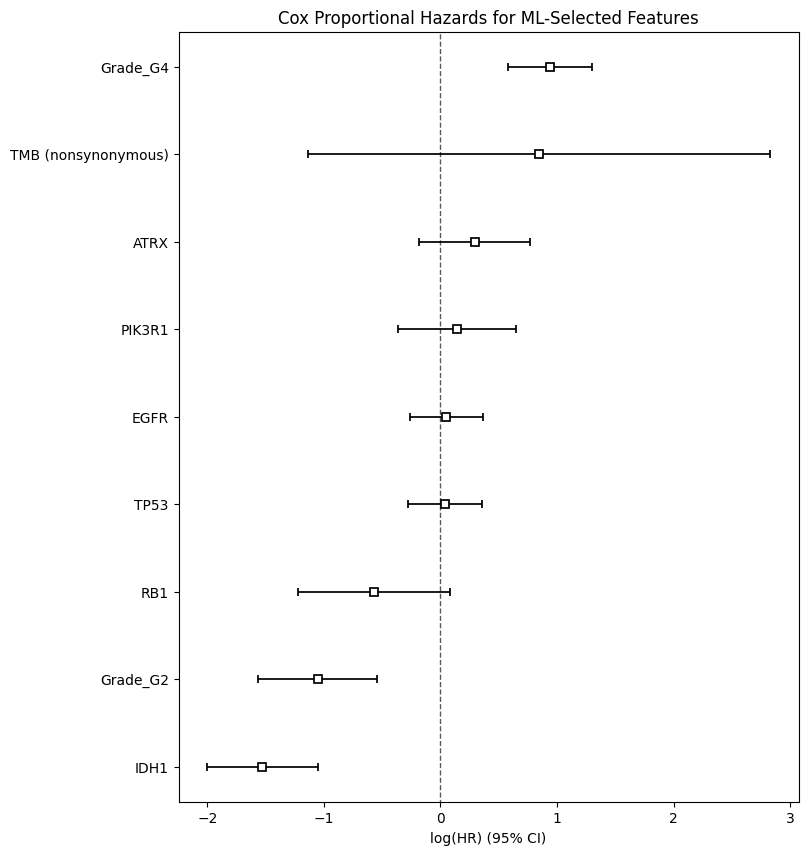

In [ ]:
# Exclude 'Patient ID' from ml_features selection
ml_features = merged_df[['Overall Survival (Months)', 'Overall Survival Status'] + [col for col in final_selected_features if col != 'Patient ID']]

# Fit Cox model with ML-selected features
cph = CoxPHFitter()
cph.fit(ml_features, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Display coefficients
cph.print_summary()

# Plot hazard ratios
plt.figure(figsize=(8, 10))
cph.plot()
plt.title("Cox Proportional Hazards for ML-Selected Features")
plt.xlabel("log(HR) (95% CI)")
plt.show()
